In [ ]:
! pip install seaborn

In [ ]:
! pip install 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import choice
import os
from price_preprocess import company_final, new_left_company, date_trans
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [2]:
trade_cal_path = 'D:\毕设code\\news_data_from2016to2021\companies\\trade_cal_clean.csv'

In [3]:
company_list = new_left_company(company_final)
company = choice(company_list).replace('.csv', '')


In [12]:
company

'000404'

In [4]:
data = pd.read_csv(os.path.join(company_final, company + '.csv'),
                   encoding='gbk').iloc[:, 2:]


In [5]:
data

,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,20211231,4.64,4.75,4.60,4.69,4.64,0.05,1.0776,127672.27,59941.5340
1,20211230,4.60,4.65,4.59,4.64,4.61,0.03,0.6508,105121.50,48646.2530
2,20211229,4.55,4.68,4.53,4.61,4.57,0.04,0.8753,144399.00,66682.4870
3,20211228,4.55,4.58,4.50,4.57,4.56,0.01,0.2193,78292.10,35529.2480
4,20211227,4.39,4.60,4.35,4.56,4.38,0.18,4.1096,165785.65,74828.9250
...,...,...,...,...,...,...,...,...,...,...
1350,20160607,7.97,7.99,7.83,7.92,7.98,-0.06,-0.7500,58887.81,46457.2192
1351,20160606,8.00,8.03,7.90,7.98,8.00,-0.02,-0.2500,50663.77,40308.3853
1352,20160603,7.94,8.00,7.85,8.00,7.97,0.03,0.3800,113021.19,89575.7344
1353,20160602,7.89,8.07,7.89,7.97,7.93,0.04,0.5000,69508.52,55409.0367


pre_close:昨收价
change:涨跌额
pct_chg:涨跌幅
vol:成交量（手）
amount:成交额(单位：千元)

In [6]:
data['trade_date'] = data['trade_date'].apply(lambda x: date_trans(str(x)))

In [7]:
data = data.set_index('trade_date')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1355 entries, 2021-12-31 to 2016-06-01
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       1355 non-null   float64
 1   high       1355 non-null   float64
 2   low        1355 non-null   float64
 3   close      1355 non-null   float64
 4   pre_close  1355 non-null   float64
 5   change     1355 non-null   float64
 6   pct_chg    1355 non-null   float64
 7   vol        1355 non-null   float64
 8   amount     1355 non-null   float64
dtypes: float64(9)
memory usage: 105.9+ KB


修改数据类型，降低内存使用。

In [9]:
data = data.astype(
    dict(zip(data.columns, ['float32'] * (len(data.columns) - 1))))


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1355 entries, 2021-12-31 to 2016-06-01
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       1355 non-null   float32
 1   high       1355 non-null   float32
 2   low        1355 non-null   float32
 3   close      1355 non-null   float32
 4   pre_close  1355 non-null   float32
 5   change     1355 non-null   float32
 6   pct_chg    1355 non-null   float32
 7   vol        1355 non-null   float32
 8   amount     1355 non-null   float64
dtypes: float32(8), float64(1)
memory usage: 63.5+ KB


In [11]:
data.describe()

,open,high,low,close,pre_close,change,pct_chg,vol,amount
count,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1.355000e+03,1355.000000
mean,5.618295,5.700170,5.542058,5.621572,5.623210,-0.001638,-0.008660,8.806343e+04,52168.787818
std,2.392952,2.433687,2.355925,2.396124,2.396171,0.124867,1.975227,8.748880e+04,55506.871591
min,3.320000,3.370000,3.260000,3.320000,3.320000,-0.810000,-9.866700,1.039950e+04,3926.610000
25%,4.000000,4.040000,3.950000,4.010000,4.010000,-0.050000,-1.031800,3.727397e+04,16199.265000
50%,4.340000,4.400000,4.280000,4.350000,4.350000,0.000000,0.000000,6.781746e+04,34106.225000
75%,6.725000,6.765000,6.600000,6.685000,6.695000,0.050000,1.024300,1.052881e+05,69295.691500
max,12.350000,12.610000,12.170000,12.380000,12.380000,0.800000,10.042700,1.232184e+06,675688.225000


In [13]:
data.isnull().sum()

open         0
high         0
low          0
close        0
pre_close    0
change       0
pct_chg      0
vol          0
amount       0
dtype: int64

In [15]:
price_gap = np.squeeze(data['close'].values)  #价格差
target = price_gap[1:] - price_gap[:-1]
target[np.where(target >= 0)] = 1
target[np.where(target < 0)] = 0

In [16]:
target

array([0., 0., 0., ..., 1., 0., 0.], dtype=float32)

In [17]:
#将ndarray转化为pandas
target_frame = pd.Series(target.tolist())

In [18]:
target_frame = target_frame.astype('int32')

In [19]:
target_frame.value_counts()

1    701
0    653
dtype: int64

In [20]:
feature_columns = data.columns

In [21]:
len(feature_columns)

9

In [22]:
#对后两个变量进行一定的数值数量级的缩小，不然影响后续作图，当然也要注意单位发生了改变，但是影响不大
data[['vol', 'amount']] = data[['vol', 'amount']].apply(lambda x: x / 10000)


<AxesSubplot:xlabel='trade_date'>

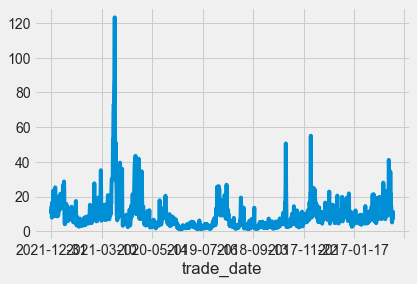

In [23]:
data[feature_columns[-2]].plot()

In [24]:
save_figure = False  #暂时不保存图片


array([[<AxesSubplot:xlabel='open', ylabel='open'>,
        <AxesSubplot:xlabel='high', ylabel='open'>,
        <AxesSubplot:xlabel='low', ylabel='open'>,
        <AxesSubplot:xlabel='close', ylabel='open'>,
        <AxesSubplot:xlabel='pre_close', ylabel='open'>,
        <AxesSubplot:xlabel='change', ylabel='open'>,
        <AxesSubplot:xlabel='pct_chg', ylabel='open'>,
        <AxesSubplot:xlabel='vol', ylabel='open'>,
        <AxesSubplot:xlabel='amount', ylabel='open'>],
       [<AxesSubplot:xlabel='open', ylabel='high'>,
        <AxesSubplot:xlabel='high', ylabel='high'>,
        <AxesSubplot:xlabel='low', ylabel='high'>,
        <AxesSubplot:xlabel='close', ylabel='high'>,
        <AxesSubplot:xlabel='pre_close', ylabel='high'>,
        <AxesSubplot:xlabel='change', ylabel='high'>,
        <AxesSubplot:xlabel='pct_chg', ylabel='high'>,
        <AxesSubplot:xlabel='vol', ylabel='high'>,
        <AxesSubplot:xlabel='amount', ylabel='high'>],
       [<AxesSubplot:xlabel='open', ylab

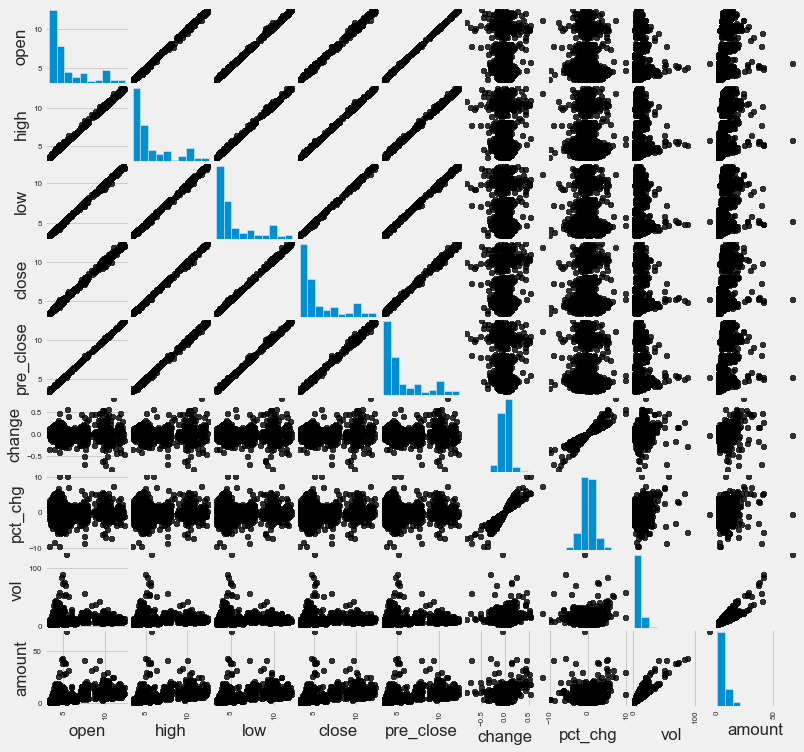

In [25]:
pd.plotting.scatter_matrix(
    data,
    figsize=(12, 12),  #注意Pandas中的用法与之前不同
    c='k',
    marker='+',
    diagonal='hist',
    alpha=0.8,
    range_padding=0.1)


<AxesSubplot:>

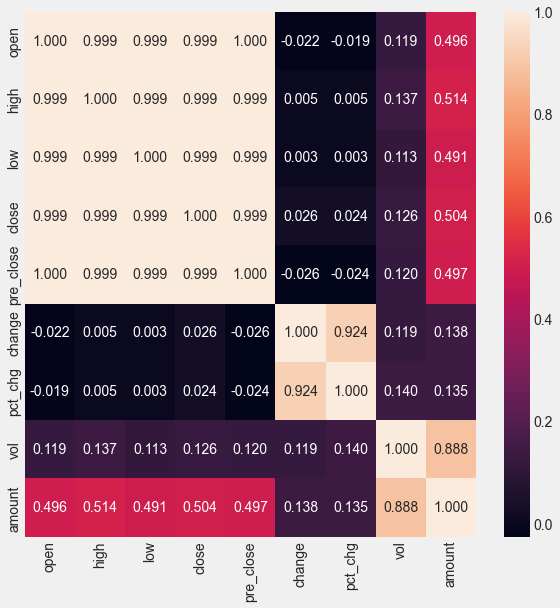

In [26]:
# 热力图
f,ax = plt.subplots(figsize=(9,9))
sns.heatmap(data.corr(), annot=True, fmt='.3f', ax=ax)

前五个特征相关，中间两个相关，后两个相关

In [27]:
#采用Pearson相关系数检验相关性时，应先检验数据是否服从正态分布
#根据上面的结果，也知道分三组讨论一下就可
#第一组
u1, u2, u3, u4, u5 = data['open'].mean(), data['high'].mean(
), data['low'].mean(), data['pre_close'].mean(), data['close'].mean()
std1, std2, std3, std4, std5 = data['open'].std(), data['high'].std(
), data['low'].std(), data['pre_close'].std(), data['close'].std()


In [28]:
data1 = data[['open','high','low','pre_close','close']]

In [29]:
# 第二组
u6,u7 = data['change'].mean(),data['pct_chg'].mean()
std6,std7 = data['change'].std(),data['pct_chg'].std()

In [30]:
data2 = data[['change','pct_chg']]

In [31]:
#第三组
u8,u9 = data['vol'].mean(),data['amount'].mean()
std8,std9 = data['vol'].std(),data['amount'].std()

In [32]:
data3 = data[['vol','amount']]

In [33]:
from scipy import stats

In [34]:
print('正态性检验：\n',stats.kstest(data['open'], 'norm', (u1, std1)))
print('正态性检验：\n',stats.kstest(data['high'], 'norm', (u2, std2)))
print('正态性检验：\n',stats.kstest(data['low'], 'norm', (u3, std3)))
print('正态性检验：\n',stats.kstest(data['pre_close'], 'norm', (u4, std4)))
print('正态性检验：\n',stats.kstest(data['close'], 'norm', (u5, std5)))
print('正态性检验：\n',stats.kstest(data['change'], 'norm', (u6, std6)))
print('正态性检验：\n',stats.kstest(data['pct_chg'], 'norm', (u7, std7)))
print('正态性检验：\n',stats.kstest(data['vol'], 'norm', (u8, std8)))
print('value1正态性检验：\n',stats.kstest(data['amount'], 'norm', (u9, std9)))


正态性检验：
 KstestResult(statistic=0.25833592475915657, pvalue=3.0467071380999935e-80)
正态性检验：
 KstestResult(statistic=0.25212810956887216, pvalue=2.131235110439573e-76)
正态性检验：
 KstestResult(statistic=0.262012899529196, pvalue=1.444053033041046e-82)
正态性检验：
 KstestResult(statistic=0.25654338280561584, pvalue=4.0201441380914195e-79)
正态性检验：
 KstestResult(statistic=0.256298271454978, pvalue=5.712175815862972e-79)
正态性检验：
 KstestResult(statistic=0.11924238659545794, pvalue=3.02868557112763e-17)
正态性检验：
 KstestResult(statistic=0.05634788947323999, pvalue=0.0003513948655958193)
正态性检验：
 KstestResult(statistic=0.1918652214417669, pvalue=3.670917568775338e-44)
value1正态性检验：
 KstestResult(statistic=0.19493863365887842, pvalue=1.3834310149508005e-45)


In [35]:
data1.corr(),data2.corr(),data3.corr()

(               open      high       low  pre_close     close
 open       1.000000  0.999301  0.999420   0.999868  0.998759
 high       0.999301  1.000000  0.999201   0.999201  0.999492
 low        0.999420  0.999201  1.000000   0.999262  0.999462
 pre_close  0.999868  0.999201  0.999262   1.000000  0.998642
 close      0.998759  0.999492  0.999462   0.998642  1.000000,
            change   pct_chg
 change   1.000000  0.924266
 pct_chg  0.924266  1.000000,
              vol    amount
 vol     1.000000  0.887939
 amount  0.887939  1.000000)

array([[<AxesSubplot:title={'center':'open'}>,
        <AxesSubplot:title={'center':'high'}>,
        <AxesSubplot:title={'center':'low'}>],
       [<AxesSubplot:title={'center':'close'}>,
        <AxesSubplot:title={'center':'pre_close'}>,
        <AxesSubplot:title={'center':'change'}>],
       [<AxesSubplot:title={'center':'pct_chg'}>,
        <AxesSubplot:title={'center':'vol'}>,
        <AxesSubplot:title={'center':'amount'}>]], dtype=object)

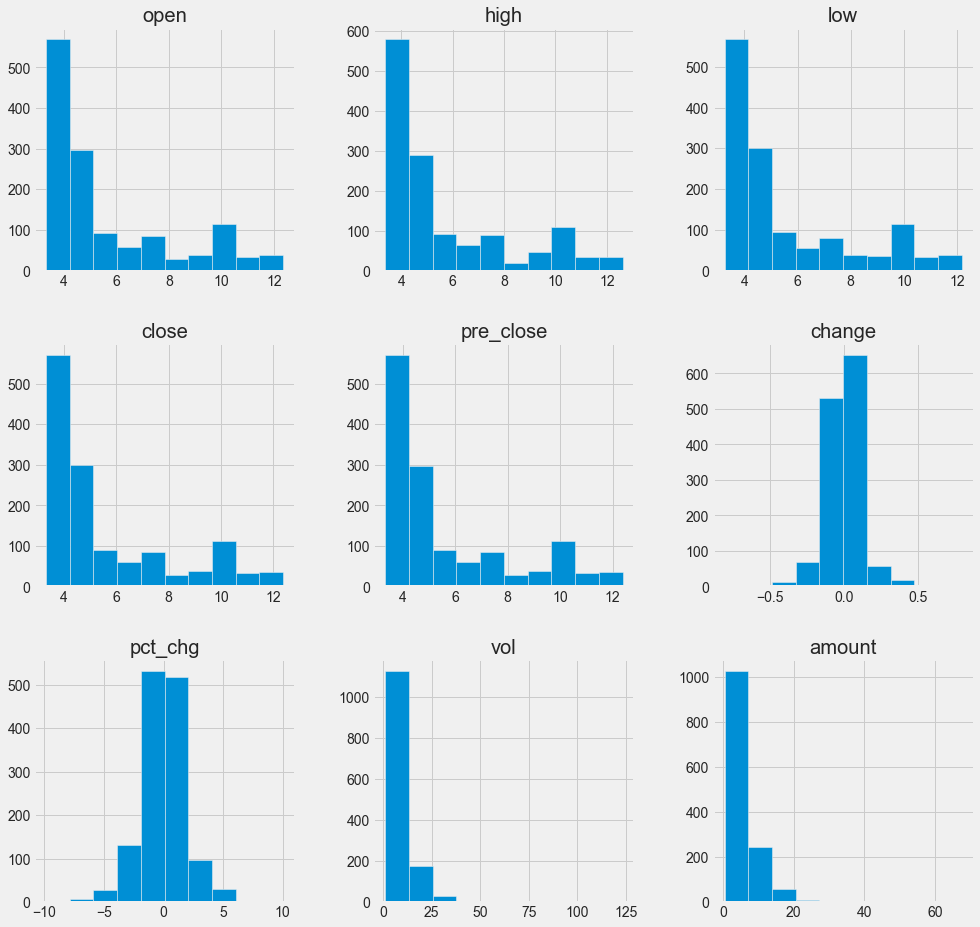

In [36]:
data.hist(figsize=(15,15))

In [37]:
#归一化之后，看一下分布
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm_data = mm.fit_transform(data)

In [38]:
mm_data_pd = pd.DataFrame(mm_data,columns=data.columns)

array([[<AxesSubplot:title={'center':'open'}>,
        <AxesSubplot:title={'center':'high'}>,
        <AxesSubplot:title={'center':'low'}>],
       [<AxesSubplot:title={'center':'close'}>,
        <AxesSubplot:title={'center':'pre_close'}>,
        <AxesSubplot:title={'center':'change'}>],
       [<AxesSubplot:title={'center':'pct_chg'}>,
        <AxesSubplot:title={'center':'vol'}>,
        <AxesSubplot:title={'center':'amount'}>]], dtype=object)

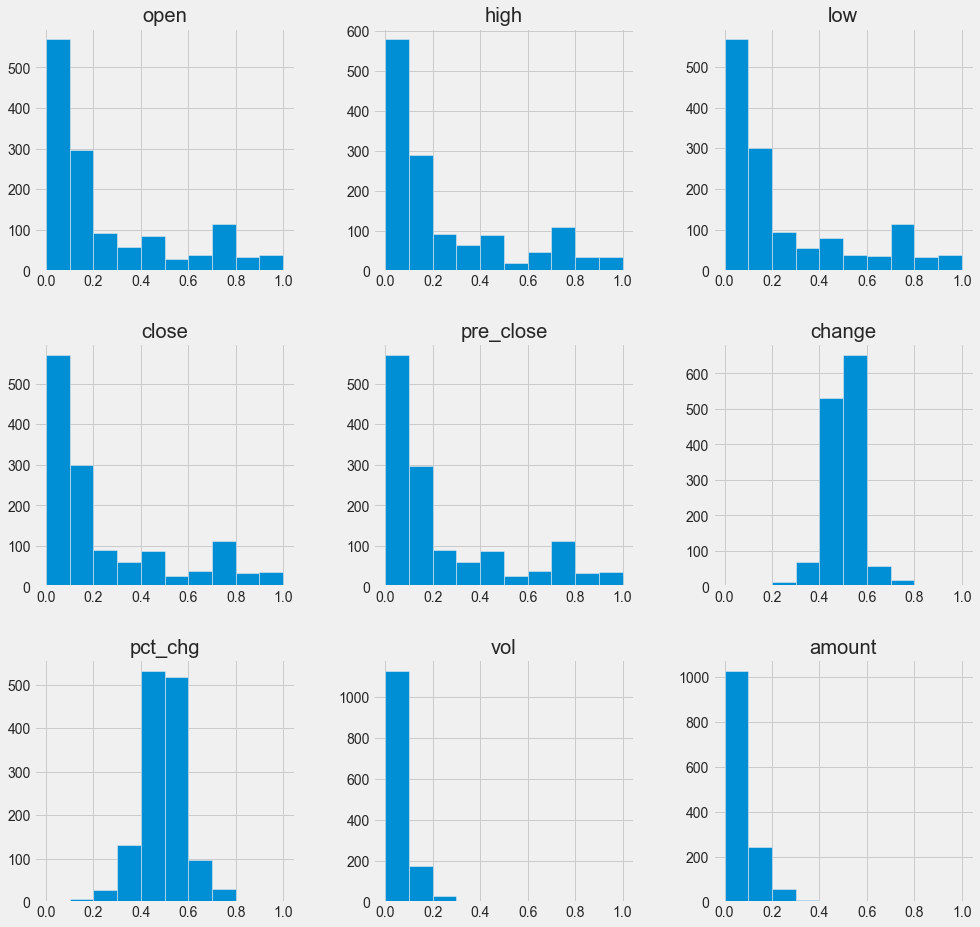

In [39]:
mm_data_pd.hist(figsize=(15,15))

In [40]:
#简单做一下互信息检验，没有太多用处
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
x,y = data[['open','high','low']].iloc[:-1,:].values,target
#返回每个特征与标签的互信息统计量
x_y_result = mutual_info_classif(x,y)
print(x_y_result)
#筛选互信息量最大的2个特征
data_feature_left1 = SelectKBest(mutual_info_classif,k=1).fit_transform(x,y)
print(data_feature_left1)
data_feature_left2 = SelectKBest(mutual_info_classif,k=2).fit_transform(x,y)
print(data_feature_left2)

[0 0 0]
[[4.6 ]
 [4.59]
 [4.53]
 ...
 [7.9 ]
 [7.85]
 [7.89]]
[[4.75 4.6 ]
 [4.65 4.59]
 [4.68 4.53]
 ...
 [8.03 7.9 ]
 [8.   7.85]
 [8.07 7.89]]


结果说明和开盘价关系最密切，和最低价关系最不密切